Q1.  You are a data analyst at an e-commerce company. Your task is to analyze sales data, 
clean and process it, perform statistical analysis, and generate visual insights to help the 
business make informed decisions. 
1. Use your roll number as the random seed to generate unique data for each student. 
2. Follow the ques ons step by step, as each part builds upon the previous one. 
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
- Well-documented code and clear comments. 
- Markdown explana ons for each step. 
- Screenshots of the plots and outputs.

Checking for missing values:
 Month          0
Product_A      0
Product_B      0
Product_C      0
Total_Sales    0
dtype: int64
Basic statistics:
            Month   Product_A  Product_B  Product_C  Total_Sales
count  12.000000   12.000000  12.000000  12.000000    12.000000
mean    6.500000   98.583333  70.333333  52.250000   221.166667
std     3.605551   23.906858  18.425937  18.493856    30.977509
min     1.000000   56.000000  40.000000  20.000000   173.000000
25%     3.750000   86.500000  55.750000  40.000000   205.500000
50%     6.500000   97.500000  71.500000  57.000000   219.000000
75%     9.250000  121.000000  85.500000  64.250000   243.500000
max    12.000000  128.000000  98.000000  77.000000   274.000000


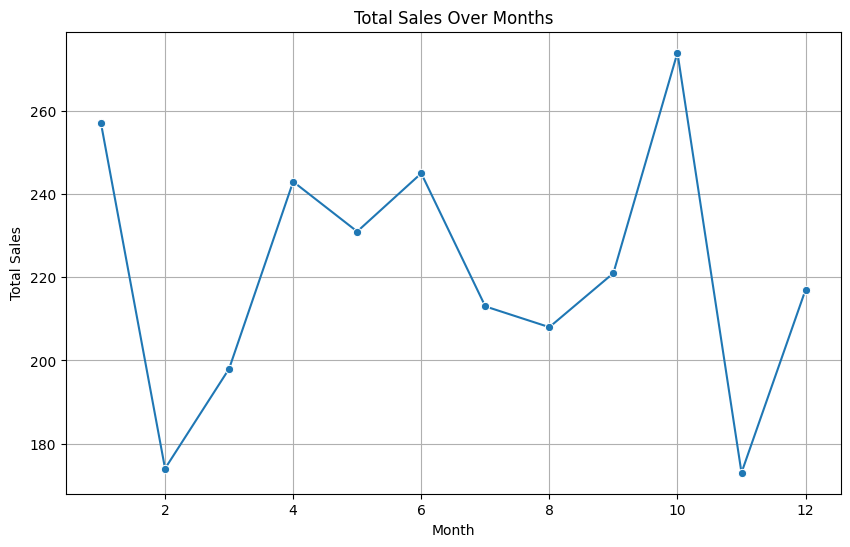

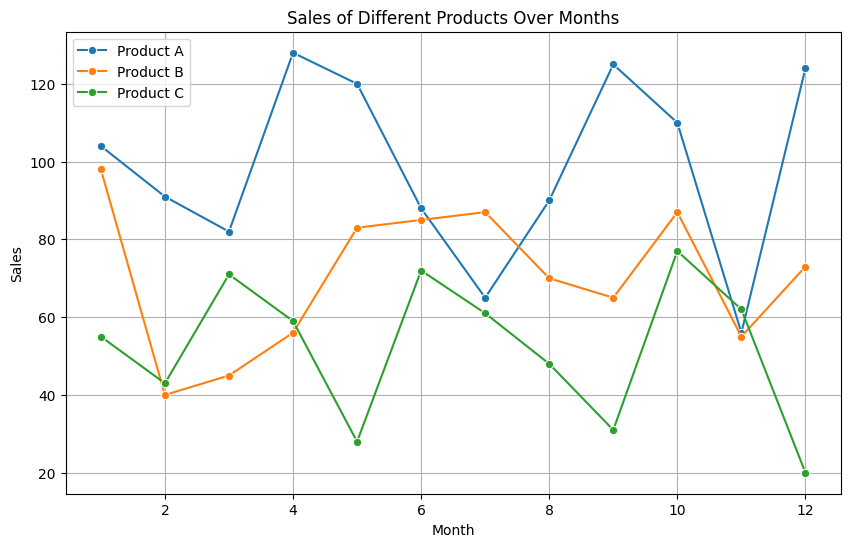

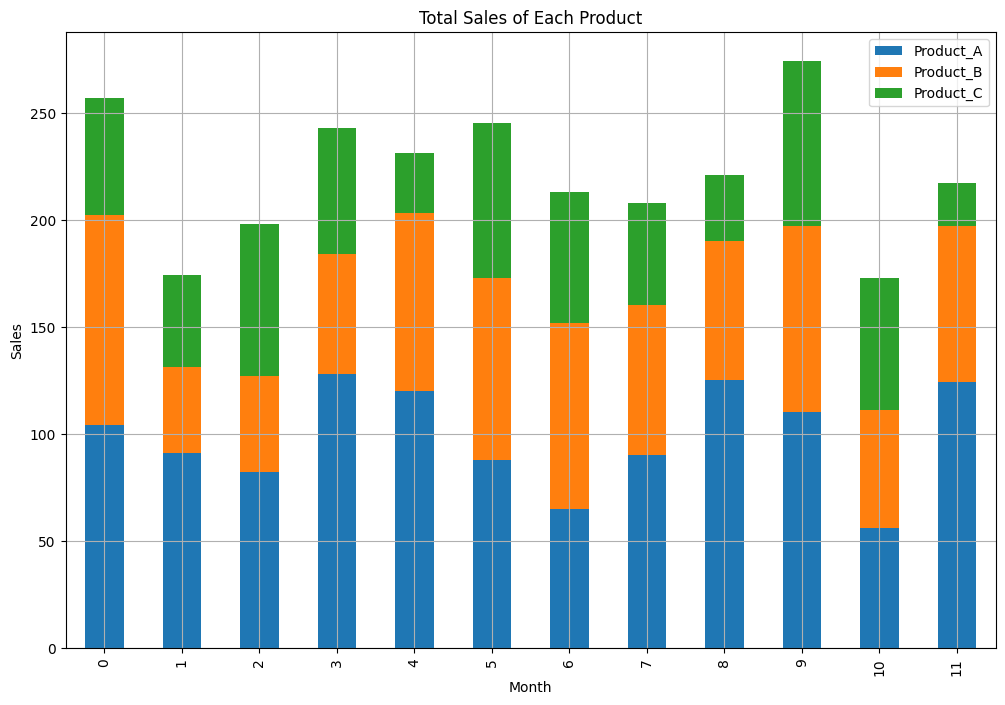

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

roll_number = 102317244
np.random.seed(roll_number)

months = np.arange(1, 13)
product_A = np.random.randint(50, 150, size=12)
product_B = np.random.randint(30, 100, size=12)
product_C = np.random.randint(20, 80, size=12)
total_sales = product_A + product_B + product_C

data = {
    'Month': months,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Total_Sales': total_sales
}
df = pd.DataFrame(data)

print("Checking for missing values:\n", df.isnull().sum())

stats = df.describe()
print("Basic statistics:\n", stats)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total_Sales', data=df, marker='o')
plt.title('Total Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Product_A', data=df, marker='o', label='Product A')
sns.lineplot(x='Month', y='Product_B', data=df, marker='o', label='Product B')
sns.lineplot(x='Month', y='Product_C', data=df, marker='o', label='Product C')
plt.title('Sales of Different Products Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

df[['Product_A', 'Product_B', 'Product_C']].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Sales of Each Product')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Part I: Randomized Sales Data Genera on (NumPy) 
1. Initialize Random Seed 
2. Generate Sales Data 
- Create a NumPy array of random sales data for 12 months (shape = (12, 4)), 
   where each column represents a product category: 
- Electronics, Clothing, Home & Kitchen, Sports. 
- Sales values should be between 1000 and 5000 units per month. 
- The range should be randomized using the seed. 
3. Convert to DataFrame 
- Convert the cleaned NumPy array into a Pandas DataFrame with: 
i. Columns: Electronics, Clothing, Home & Kitchen, Sports 
ii. Index: Months from Jan to Dec 

In [2]:
roll_number = 102317244
np.random.seed(roll_number)
sales_data = np.random.randint(1000, 5001, size=(12, 4))
columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(sales_data, columns=columns, index=index)
print("Generated Sales Data:")
print(df)

Generated Sales Data:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         4638      2065            2440    2786
Feb         2017      2742            1198    1550
Mar         1015      4752            2995    4950
Apr         3414      3236            2670    2226
May         2092      4722            2749    3319
Jun         3202      4831            1693    1458
Jul         2896      3231            3374    4897
Aug         1808      3083            3133    4129
Sep         1025      2451            3275    3711
Oct         2459      2255            4272    3228
Nov         3729      4804            4147    4577
Dec         1062      4818            2856    1857


Part II: Data Manipula on and Analysis (Pandas) 
1. Display the first 5 rows and summary sta s cs of the DataFrame. 
2. Calculate the total sales per category and total sales per month. 
3. Calculate the average sales growth between consecutive months for each category. 
4. Add the following columns to the DataFrame: 
- Total Sales: Sum of all categories per month. 
- Growth Rate: Percentage change in Total Sales from the previous month. 
5. Apply a randomized discount: 
- If your roll number is even, apply a 10% discount to the Electronics category. 
- If odd, apply a 15% discount to the Clothing category.

In [3]:
roll_number = 12317244
np.random.seed(roll_number)

sales_data = np.random.randint(1000, 5001, size=(12, 4))
columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(sales_data, columns=columns, index=index)


print("First 5 rows of the DataFrame:")
print(df.head())

print("\nSummary statistics of the DataFrame:")
print(df.describe())

total_sales_per_category = df.sum()
total_sales_per_month = df.sum(axis=1)

print("\nTotal sales per category:")
print(total_sales_per_category)

print("\nTotal sales per month:")
print(total_sales_per_month)

avg_sales_growth = df.pct_change().mean() * 100
print("\nAverage sales growth between consecutive months for each category (in %):")
print(avg_sales_growth)


df['Total Sales'] = df.sum(axis=1)
df['Growth Rate'] = df['Total Sales'].pct_change() * 100

print("\nDataFrame with Total Sales and Growth Rate columns added:")
print(df)

if roll_number % 2 == 0:
    df['Electronics'] = df['Electronics'] * 0.9
else:
    df['Clothing'] = df['Clothing'] * 0.85

print("\nDataFrame after applying the discount:")
print(df)

First 5 rows of the DataFrame:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         4283      1034            1167    3909
Feb         2291      1147            2193    2215
Mar         2559      4783            4427    3857
Apr         4149      1599            2677    1108
May         4046      3770            3280    4094

Summary statistics of the DataFrame:
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   3117.250000  2670.583333     3116.583333  3006.916667
std    1043.683436  1110.371802     1329.449610  1256.863373
min    1255.000000  1034.000000     1167.000000  1108.000000
25%    2492.000000  1943.250000     2211.750000  2024.000000
50%    3071.500000  2679.500000     2978.500000  3118.500000
75%    4071.750000  3454.750000     4217.000000  3955.250000
max    4350.000000  4783.000000     4960.000000  4818.000000

Total sales per category:
Electronics       37407
Clothing          32047
H

Part III: Visualizations (Matplotlib and Seaborn) 
1. Plot monthly sales trends for each category using line plots. 
2. Create the following plots: 
- Box plots to show the sales distribution for each category.

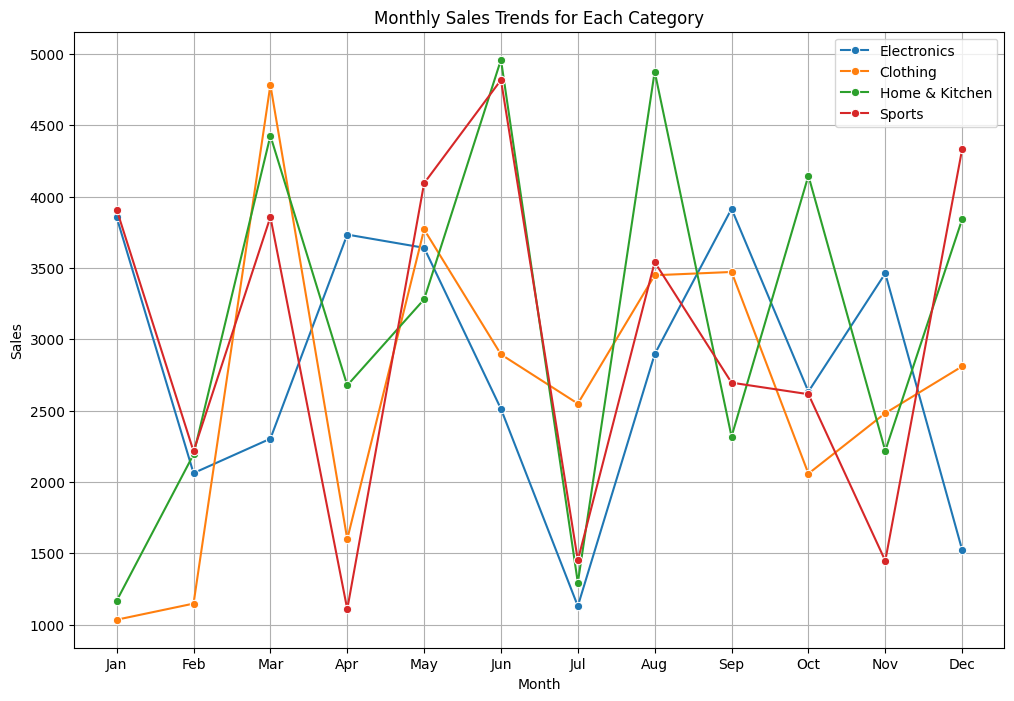

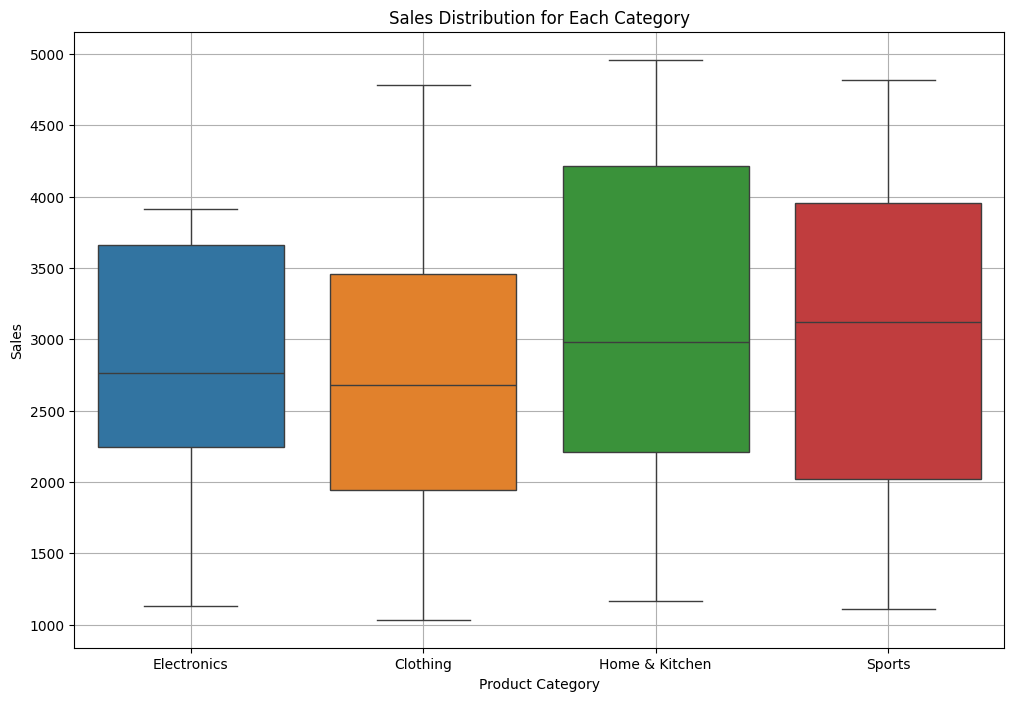

In [4]:
# 1. Plotting monthly sales trends for each category using line plots
plt.figure(figsize=(12, 8))
sns.lineplot(x=df.index, y='Electronics', data=df, marker='o', label='Electronics')
sns.lineplot(x=df.index, y='Clothing', data=df, marker='o', label='Clothing')
sns.lineplot(x=df.index, y='Home & Kitchen', data=df, marker='o', label='Home & Kitchen')
sns.lineplot(x=df.index, y='Sports', data=df, marker='o', label='Sports')
plt.title('Monthly Sales Trends for Each Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 2. Create box plots to show the sales distribution for each category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']])
plt.title('Sales Distribution for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]]) 
- Find element-wise absolute value 
- Find the 25th, 50th, and 75th percentile of flatened array, for each column, for each 
row. 
- Mean, Median and Standard Deviation of flatened array, of each column, and 
each row 

In [5]:
array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. 
abs_array = np.abs(array)
print("Element-wise absolute value:\n", abs_array)

# ii. 
flattened_array = array.flatten()

percentiles_flattened = np.percentile(flattened_array, [25, 50, 75])
print("\nPercentiles of flattened array:\n25th: {}\n50th: {}\n75th: {}".format(
    percentiles_flattened[0], percentiles_flattened[1], percentiles_flattened[2]
))

percentiles_columns = np.percentile(array, [25, 50, 75], axis=0)
print("\nPercentiles for each column:\n25th: {}\n50th: {}\n75th: {}".format(
    percentiles_columns[0], percentiles_columns[1], percentiles_columns[2]
))

percentiles_rows = np.percentile(array, [25, 50, 75], axis=1)
print("\nPercentiles for each row:\n25th: {}\n50th: {}\n75th: {}".format(
    percentiles_rows[0], percentiles_rows[1], percentiles_rows[2]
))

# iii. 
mean_flattened = np.mean(flattened_array)
median_flattened = np.median(flattened_array)
std_flattened = np.std(flattened_array)

print("\nFlattened array statistics:\nMean: {}\nMedian: {}\nStandard Deviation: {}".format(
    mean_flattened, median_flattened, std_flattened
))

mean_columns = np.mean(array, axis=0)
median_columns = np.median(array, axis=0)
std_columns = np.std(array, axis=0)

print("\nColumn-wise statistics:\nMean: {}\nMedian: {}\nStandard Deviation: {}".format(
    mean_columns, median_columns, std_columns
))

mean_rows = np.mean(array, axis=1)
median_rows = np.median(array, axis=1)
std_rows = np.std(array, axis=1)

print("\nRow-wise statistics:\nMean: {}\nMedian: {}\nStandard Deviation: {}".format(
    mean_rows, median_rows, std_rows
))


Element-wise absolute value:
 [[1 2 3]
 [4 5 6]]

Percentiles of flattened array:
25th: -3.5
50th: -0.5
75th: 2.5

Percentiles for each column:
25th: [-2.75 -0.25 -3.75]
50th: [-1.5  1.5 -1.5]
75th: [-0.25  3.25  0.75]

Percentiles for each row:
25th: [-0.5 -5. ]
50th: [ 1. -4.]
75th: [2.  0.5]

Flattened array statistics:
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224

Column-wise statistics:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]

Row-wise statistics:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).  
- Find floor, ceiling and truncated value, rounded values 

In [6]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

# i.
floor_values = np.floor(a)
ceiling_values = np.ceil(a)
truncated_values = np.trunc(a)
rounded_values = np.round(a)

print("Original array:", a)
print("Floor values:", floor_values)
print("Ceiling values:", ceiling_values)
print("Truncated values:", truncated_values)
print("Rounded values:", rounded_values)

Original array: [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]
Floor values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded values: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [7]:
def swap_elements(lst, index1, index2):
    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp
    return lst

example_list = [10, 20, 30, 40, 50]
index1, index2 = 1, 3

swapped_list = swap_elements(example_list, index1, index2)
print("List after swapping elements at indices {} and {}: {}".format(index1, index2, swapped_list))

List after swapping elements at indices 1 and 3: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by conver ng it to a list first. 

In [8]:
def swap_elements_in_set(s, element1, element2):
    lst = list(s)

    index1, index2 = lst.index(element1), lst.index(element2)

    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp

    swapped_set = set(lst)

    return swapped_set

example_set = {10, 20, 30, 40, 50}
element1, element2 = 20, 40

swapped_set = swap_elements_in_set(example_set, element1, element2)
print("Set after swapping elements {} and {}: {}".format(element1, element2, swapped_set))

Set after swapping elements 20 and 40: {40, 10, 50, 20, 30}
